In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Multiple Linear Regression using Gradient Descent

In [76]:
# download the dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape # 20640, 8
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Feature Normalization

1. Subtract the mean value of each feature from the dataset.
2. After subtracting the mean, additionally scale (divide) the feature values by their resp. standard deviations.


In [77]:
X = (X - np.mean(X))/np.std(X)

/Users/kavyakumar/anaconda3/envs/mlmodels/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [78]:
# after feature norm
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


# Create Train - Test split

In [79]:
# Concat X and y 
X = pd.concat([X, y], axis=1)

# get train and test sets
train_set = X.sample(frac=0.8, replace=False, random_state=42)

# Drop all indexes from the dataframe that exist in the training set
test_set = X.drop(train_set.index)

print(len(train_set), len(test_set))

16512 4128


In [80]:
X_train, y_train = train_set.iloc[:, :-1].to_numpy(), train_set.iloc[:, -1].to_numpy()
X_test, y_test = test_set.iloc[:, :-1].to_numpy(), test_set.iloc[:, -1].to_numpy()

# adding intercept term to X_train and X_test data in 0th column
# now, we will have 8 + 1 i.e (m+1) features
ones = np.ones((X_train.shape[0],1))
X_train = np.column_stack((ones, X_train)) # same as np.hstack((ones, X_train))

ones = np.ones((X_test.shape[0],1))
X_test = np.column_stack((ones, X_test)) # same as np.hstack((ones, X_train))

# adding 1 column to y_train and y_test data
y_train, y_test = y_train[:, np.newaxis], y_test[:, np.newaxis]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_test)

(16512, 9) (16512, 1) (4128, 9) (4128, 1)
[[ 1.         -0.09446958  1.85618152 ... -0.08650142  1.03382082
  -1.33781784]
 [ 1.         -0.31591677  1.85618152 ... -0.09836595  1.03850269
  -1.34280914]
 [ 1.         -0.63011176  1.85618152 ... -0.10474848  1.03382082
  -1.34280914]
 ...
 [ 1.         -0.39250476 -1.08376738 ... -0.03381297  1.69864575
  -0.93851326]
 [ 1.         -1.14259331 -0.92485123 ... -0.0717345   1.77823747
  -0.8237132 ]
 [ 1.         -0.78012947 -1.00430931 ... -0.04368215  1.75014627
  -0.83369581]]


# Calculate Closed form solution:
 Calculate R2 score to check whether Multi Linear Regression is a good model 
 or if non-linear relationships are present
 which can be better explained with a knn or trees model

In [127]:
# Closed form solution :
def closed_form_solution(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

w = closed_form_solution(X_train, y_train)
print("theta coefficients: \n", w)
# calculate r2 score on closed form solution
y_train_pred = X_train @ w
train_score = r2_score(y_train, y_train_pred)
mae_s = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
mse_s = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_s = np.sqrt(mse)
print(f'\nR2 score (train): {train_score:.4f}')
print("MAE (train): ", round(mae_s,2))
print("MSE (train): ", round(mse_s,2))
print("RMSE (train): ", round(rmse_s,2))


y_test_pred = X_test @ w

test_score = r2_score(y_test, y_test_pred)
mae_s = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
mse_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse_s = np.sqrt(mse)
print(f'\nR2 score (test): {test_score:.4f}')
print("MAE (test): ", round(mae_s,2))
print("MSE (test): ", round(mse_s,2))
print("RMSE (test): ", round(rmse_s,2))

"""
Thus, the MLP model cannot do very well on the dataset. The dataset probably contains
non-linear relationships that need to be explored by knn or random forests models.
"""

theta coefficients: 
 [[ 2.06700856]
 [ 0.84498499]
 [ 0.118311  ]
 [-0.29811491]
 [ 0.31340891]
 [-0.00863296]
 [-0.04298875]
 [-0.88590272]
 [-0.85719466]]

R2 score (train): 0.6105
MAE (train):  0.53
MSE (train):  0.52
RMSE (train):  0.64

R2 score (test): 0.5875
MAE (test):  0.54
MSE (test):  0.56
RMSE (test):  0.64


'\nThus, the MLP model cannot do very well on the dataset. The dataset probably contains\nnon-linear relationships that need to be explored by knn or random forests models.\n'

# Create Multi Linear Regression Class

In [103]:
class MultiLinearRegression():
    def __init__(self, m_features, lr):
        self.theta = np.ones(shape=(m_features, 1)) # theta0, theta1, ..., theta_m
        self.lr = lr
        return
    
    def forward(self, X):
        return np.dot(X, self.theta) # n x 1
    
    def backward(self, X, y, y_hat):
        m = y.shape[0]
        temp = y_hat - y
        temp = np.dot(X.T, temp)
        d_theta = (1/m) * temp # (m+1) x 1
        self.theta -= self.lr * d_theta
        return
        
def avg_mse_loss(y, y_hat):
    m = y_hat.shape[0]
    e = y_hat - y
    return np.sum(np.power(e,2)) / (2*m)

# Import model and hyperparameters

In [121]:
epochs = 5000
lr = 0.001
features = X_train.shape[1] # (m + 1)

model = MultiLinearRegression(m_features=features, lr=lr)
print(model.theta.shape)

(9, 1)


# Training Pipeline

In [122]:
y_train.shape, model.forward(X_train).shape

((16512, 1), (16512, 1))

In [123]:
train_loss = []
for epoch in range(epochs):
    # forward propagation
    y_hat = model.forward(X=X_train) # nx1

    # calculate loss
    cf = avg_mse_loss(y=y_train, y_hat=y_hat)
    train_loss.append(cf)

    # backward propagation, calculate gradients, update weights
    model.backward(X=X_train, y=y_train, y_hat=y_hat)

    if epoch%2000==0:
        print(f'RMSE Loss = {round(np.sqrt(cf),2)} at epoch {epoch}/{epochs}')

RMSE Loss = 1.94 at epoch 0/5000
RMSE Loss = 0.71 at epoch 2000/5000
RMSE Loss = 0.63 at epoch 4000/5000


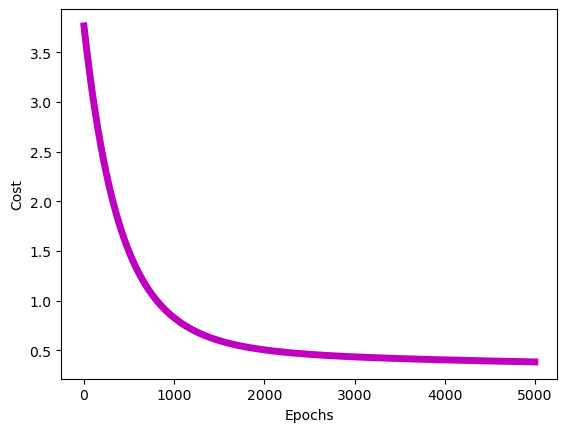

In [124]:
def plot_cost(loss, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, loss, 'm', linewidth = "5")
	plt.show()

plot_cost(train_loss, range(epochs))


# Predict on test data

In [125]:

def predict():
    # store best weights
    trained_theta = model.theta
    batch = X_test.shape[0]
    y_hat = np.dot(X_test, trained_theta)

    # rmse
    mse = avg_mse_loss(y=y_test, y_hat=y_hat)
    rmse = np.sqrt(mse)

    # mae
    e = np.abs(y_test-y_hat)
    mae = (1/(batch)) * np.sum(e)

    # r squared
    y_mean = np.mean(y_test)
    sst = np.sum((y_test-y_mean)**2)
    sse = np.sum((y_test-y_hat)**2)
    r2 = 1 - (sse/sst)
    
    return mae, mse, rmse, r2

In [126]:
mae, mse, rmse, r2 = predict()

y_hat = model.forward(X_test)
mae_s = mean_absolute_error(y_true=y_test, y_pred=y_hat)
mse_s = mean_squared_error(y_true=y_test, y_pred=y_hat)
rmse_s = np.sqrt(mse)
r2_s = r2_score(y_true=y_test, y_pred=y_hat)

print("Eval metrics calculated through my predict() function vs sklearn :")
print("MAE sklearn: ", round(mae_s,2), " MAE predict(): ", round(mae, 2))
print("MSE sklearn: ", round(mse_s,2), " MSE predict(): ", round(mse,2))
print("RMSE sklearn: ", round(rmse_s,2), " RMSE predict(): ", round(rmse,2))
print("R2 sklearn: ", round(r2_s,2), " R2 predict(): ", round(r2,2))


Eval metrics calculated through my predict() function vs sklearn :
MAE sklearn:  0.67  MAE predict():  0.67
MSE sklearn:  0.81  MSE predict():  0.41
RMSE sklearn:  0.64  RMSE predict():  0.64
R2 sklearn:  0.4  R2 predict():  0.4
